In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://drive.google.com/file/d/13TjvPYdYJ0bAa6FkoQKfGqzTnCTHTg-z/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


**Pre processing**

In [3]:
for j in df.columns:
    if df[f'{j}'].dtypes=='O':
        dit9={}
        x=0
        for i in df[f'{j}']:
            if i not in dit9:
                dit9[i]=x
                x+=1
        df[f'{j}']=df[f'{j}'].map(dit9)
df

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,0,14,30,0,-20.79,13.16,42.86,0,0,0,0,7,0,0,34,0
1,2,2112635,1,18,30,0,50.00,320.00,180.00,0,0,1,1,8,1,1,34,0
2,3,2112838,1,3,45,0,42.84,42.84,0.00,0,0,1,0,4,1,0,27,0
3,4,2115021,1,26,30,0,42.84,42.84,0.00,0,0,1,1,4,1,0,34,0
4,5,2115125,0,1,120,0,42.59,42.59,0.00,0,1,1,1,6,1,0,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,1,4,0,1,191.67,191.67,0.00,0,0,1,1,1,0,1,34,0
8991,12327,3828206,0,2,0,1,150.00,150.00,0.00,0,0,0,2,3,3,1,34,0
8992,12331,3834159,1,0,0,0,35.42,35.42,0.00,0,0,1,2,5,1,0,34,0
8993,12332,3835433,1,0,30,1,76.92,53.85,-13.04,0,0,1,2,4,1,0,34,0


In [4]:
df_r=df
df[f'{df.columns[-1]}'].value_counts()

0    7313
1    1682
Name: Status, dtype: int64

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
X1= df_r.iloc[:,:-1]
y1=df_r.iloc[:,-1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=50)

In [6]:
df1=pd.concat([X1_train,y1_train],axis=1)
p=df1[f'{df1.columns[-1]}'].value_counts()
p

0    5847
1    1349
Name: Status, dtype: int64

In [7]:
#Over-sampling
from sklearn.utils import resample
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=max(p), 
                                 random_state=123) 
df_up = pd.concat([df_majority, df_minority_upsampled])
df_up[f'{df.columns[-1]}'].value_counts()

0    5847
1    5847
Name: Status, dtype: int64

In [8]:
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=min(p),
                                 random_state=123) 
df_down = pd.concat([df_majority_downsampled, df_minority])
df_down[f'{df.columns[-1]}'].value_counts()

0    1349
1    1349
Name: Status, dtype: int64

In [9]:
X2_train= df_up.iloc[:,:-1]
y2_train=df_up.iloc[:,-1]
X3_train= df_down.iloc[:,:-1]
y3_train=df_down.iloc[:,-1]
X3_train

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age
4251,5685,2604249,0,69,60,2,2.13,2.13,0.00,0,0,1,2,13,5,3,42
4527,6017,2779159,0,2,30,1,42.86,25.00,-12.50,0,0,1,2,3,0,1,30
819,1056,2194924,0,68,75,1,35.29,23.53,-8.70,0,1,1,2,3,0,1,25
5575,7316,3051053,1,4,60,0,5.26,0.44,-4.58,0,0,1,0,9,3,1,31
2342,3311,2368780,0,29,30,1,42.86,42.86,0.00,0,0,0,1,4,4,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118,6769,2859446,1,4,90,1,36.99,6.85,-22.00,0,0,1,2,6,6,4,31
3883,5228,2564948,1,49,30,0,9.09,23.64,13.33,0,0,1,0,8,0,1,36
3022,4178,2441143,0,3,60,1,21.21,31.31,8.33,0,0,1,2,4,0,1,29
7917,10307,3429727,0,13,30,1,50.00,50.00,0.00,0,0,1,0,3,1,2,34


In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X4_train, y4_train = sm.fit_resample(X1_train, y1_train)


from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X5_train, y5_train = nt.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import NearMiss
nr = NearMiss()
X6_train, y6_train= nr.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X9_train, y9_train = nt.fit_resample(X4_train, y4_train)

In [11]:
from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X7_train, y7_train = nt.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X8_train, y8_train= nr.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X10_train, y10_train= nr.fit_resample(X4_train, y4_train)

In [12]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []

**Decision Tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()
clf10 = DecisionTreeClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [14]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf2 = GaussianNB()
clf3 = GaussianNB()
clf4 = GaussianNB()
clf5 = GaussianNB()
clf6 = GaussianNB()
clf7 = GaussianNB()
clf8 = GaussianNB()
clf9 = GaussianNB()
clf10 = GaussianNB()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [16]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**K-Nearest Neighbor (KNN)**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf2 = KNeighborsClassifier()
clf3 = KNeighborsClassifier()
clf4 = KNeighborsClassifier()
clf5 = KNeighborsClassifier()
clf6 = KNeighborsClassifier()
clf7 = KNeighborsClassifier()
clf8 = KNeighborsClassifier()
clf9 = KNeighborsClassifier()
clf10 = KNeighborsClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [18]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**AdaBoost Classifier**

In [19]:
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier()
clf2 = AdaBoostClassifier()
clf3 = AdaBoostClassifier()
clf4 = AdaBoostClassifier()
clf5 = AdaBoostClassifier()
clf6 = AdaBoostClassifier()
clf7 = AdaBoostClassifier()
clf8 = AdaBoostClassifier()
clf9 = AdaBoostClassifier()
clf10 = AdaBoostClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [20]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()
clf4 = LogisticRegression()
clf5 = LogisticRegression()
clf6 = LogisticRegression()
clf7 = LogisticRegression()
clf8 = LogisticRegression()
clf9 = LogisticRegression()
clf10 = LogisticRegression()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [22]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Graph**

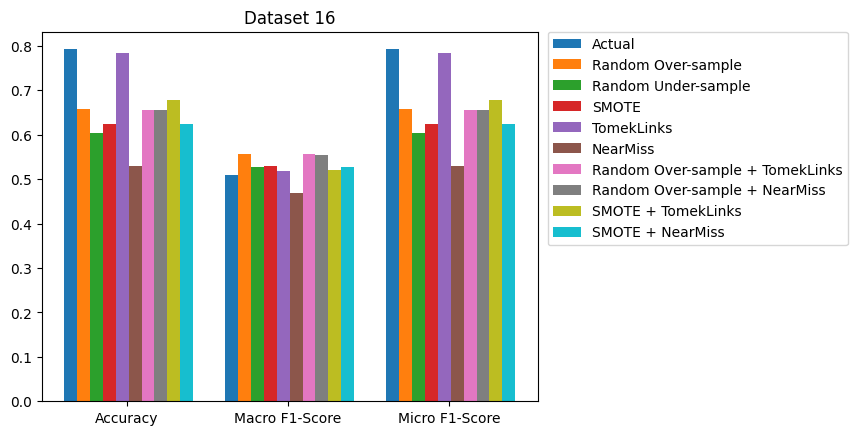

In [23]:
A1 = []
B1 = []
C1 = []
D1 = []
E1 = []
F1 = []
G1 = []
H1 = []
I1 = []
J1 = []
X = ['Accuracy','Macro F1-Score','Micro F1-Score']
X_axis = np.arange(len(X))
for i in range(3):
    k=0
    for j in range(i,len(A),3):
        k+=(A[j]/5)
    A1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(B),3):
        k+=(B[j]/5)
    B1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(C),3):
        k+=(C[j]/5)
    C1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(D),3):
        k+=(D[j]/5)
    D1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(E),3):
        k+=(E[j]/5)
    E1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(F),3):
        k+=(F[j]/5)
    F1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(G),3):
        k+=(G[j]/5)
    G1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(H),3):
        k+=(H[j]/5)
    H1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(I),3):
        k+=(I[j]/5)
    I1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(J),3):
        k+=(J[j]/5)
    J1+=[k]
     
plt.bar(X_axis, A1, 0.08, label = 'Actual')
plt.bar(X_axis+0.08 , B1, 0.08, label = 'Random Over-sample')
plt.bar(X_axis + 0.16, C1, 0.08, label = 'Random Under-sample')
plt.bar(X_axis + 0.24, D1, 0.08, label = 'SMOTE')
plt.bar(X_axis+0.32, E1, 0.08, label = 'TomekLinks')
plt.bar(X_axis+0.40 , F1, 0.08, label = 'NearMiss')
plt.bar(X_axis + 0.48, G1, 0.08, label = 'Random Over-sample + TomekLinks')
plt.bar(X_axis + 0.56, H1, 0.08, label = 'Random Over-sample + NearMiss')
plt.bar(X_axis + 0.64, I1, 0.08, label = 'SMOTE + TomekLinks')
plt.bar(X_axis + 0.72, J1, 0.08, label = 'SMOTE + NearMiss')

plt.xticks(X_axis+0.35, X)
plt.title("Dataset 16")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()